In [8]:
import random
import matplotlib.pyplot as plt

In [10]:
from ner_machine_learning import (
    extract_features_and_labels_onehot,
    create_classifier,
    classify_data,
    retrieve_metrics_and_cm,
    retrieve_weighted_metrics,
    span_based_eva_pipeline,
)

In [3]:
def filter_features(features_dict, selected_features):
    """
    Filter the keys in featchers_dict, keeping only the features specified in selected_features
    :param features_dict: the feature dictionary for each token sample
    :param selected_features: the features to keep
    :return: filtered feature dictionary
    """
    return {key: value for key, value in features_dict.items() if key in selected_features}

In [4]:
def extract_features_and_labels_ablation(trainingfile, selected_features):
    data, targets = [], []
    with open(trainingfile, 'r', encoding='utf8') as infile:
        for line in infile:
            components = line.rstrip('\n').split()
            if len(components) > 0:
                feature_dict = {
                    'token': components[0],
                    'pos_tag': components[1],
                    'syntactic_tag': components[2],
                    'uppercase': components[4],
                    'prev_uppercase': components[5],
                    'next_uppercase': components[6],
                    'prev_token': components[7],
                    'next_token': components[8],
                    'prefix': components[9],
                    'suffix': components[10],
                }
                filtered_features = filter_features(feature_dict, selected_features)
                data.append(filtered_features)
                targets.append(components[3])
    return data, targets

In [26]:
def feature_ablation_pipeline(training_file, test_file, output_dir, selected_feature_combinations):
    results = []

    for selected_features in selected_feature_combinations:
        print(f"Evaluating feature subset: {selected_features}")

        # Step 1: Extract training and testing (on dev) features
        train_features, train_targets = extract_features_and_labels_ablation(training_file, selected_features)
        test_features, test_targets = extract_features_and_labels_ablation(test_file, selected_features)

        # Step 2: Train the SVM model
        model, vec = create_classifier(train_features, train_targets, 'SVM')

        # Step 3: Use the trained model for prediction and save
        output_file = f"{output_dir}/test_pred_{'_'.join(selected_features)}.conll"
        classify_data(model, vec, test_file, output_file)

        # Step 4: Evaluations
        metrics_file = f"{output_dir}/metrics_{'_'.join(selected_features)}.txt"
        weighted_metrics_file = f"{output_dir}/weighted_metrics_{'_'.join(selected_features)}.txt"
        span_metrics_file = f"{output_dir}/span_metrics_{'_'.join(selected_features)}.txt"
        retrieve_metrics_and_cm(test_file, output_file, metrics_file, f"{metrics_file}.png")
        #retrieve_weighted_metrics(test_file, output_file, weighted_metrics_file)
        span_based_eva_pipeline(test_file, output_file, span_metrics_file)

In [27]:
feature_list_full = ['token',
                    'pos_tag',
                    'syntactic_tag',
                    'uppercase',
                    'prev_uppercase',
                    'next_uppercase',
                    'prev_token',
                    'next_token',
                    'prefix',
                    'suffix']

In [28]:
# full - sub-token features
feature_8 = ['token',
                    'pos_tag',
                    'syntactic_tag',
                    'uppercase',
                    'prev_uppercase',
                    'next_uppercase',
                    'prev_token',
                    'next_token']

In [29]:
# full - contextual token features
feature_7 = ['token',
                    'pos_tag',
                    'syntactic_tag',
                    'uppercase',
                    'prev_uppercase',
                    'next_uppercase',
                    'prefix',
                    'suffix']

In [30]:
# full - (sub-token features + contextual token features)
feature_6 = ['token',
                    'pos_tag',
                    'syntactic_tag',
                    'uppercase',
                    'prev_uppercase',
                    'next_uppercase']

In [31]:
# full - case information of contextual tokens
feature_5 = ['token',
                    'pos_tag',
                    'syntactic_tag',
                    'uppercase',
                    'prev_token',
                    'next_token',
                    'prefix',
                    'suffix']

In [32]:
# full - (case information of contextual tokens + sub-token features)
feature_4 = ['token',
                    'pos_tag',
                    'syntactic_tag',
                    'uppercase',
                    'prev_token',
                    'next_token']

In [33]:
feature_3 = ['token',
                    'pos_tag',
                    'syntactic_tag',
                    'uppercase',
                    'prefix',
                    'suffix']

In [34]:
# only direct available information in data
feature_2 = ['token',
                    'pos_tag',
                    'syntactic_tag',
                    'uppercase']

In [35]:
feature_1 = ['token', 'pos_tag','syntactic_tag']

In [36]:
feature_0 = ['token']

In [37]:
selected_feature_combinations = [feature_list_full, feature_0, feature_1,feature_2, feature_3, feature_4, feature_5, feature_6, feature_7, feature_8]

In [38]:
print(selected_feature_combinations)

[['token', 'pos_tag', 'syntactic_tag', 'uppercase', 'prev_uppercase', 'next_uppercase', 'prev_token', 'next_token', 'prefix', 'suffix'], ['token'], ['token', 'pos_tag', 'syntactic_tag'], ['token', 'pos_tag', 'syntactic_tag', 'uppercase'], ['token', 'pos_tag', 'syntactic_tag', 'uppercase', 'prefix', 'suffix'], ['token', 'pos_tag', 'syntactic_tag', 'uppercase', 'prev_token', 'next_token'], ['token', 'pos_tag', 'syntactic_tag', 'uppercase', 'prev_token', 'next_token', 'prefix', 'suffix'], ['token', 'pos_tag', 'syntactic_tag', 'uppercase', 'prev_uppercase', 'next_uppercase'], ['token', 'pos_tag', 'syntactic_tag', 'uppercase', 'prev_uppercase', 'next_uppercase', 'prefix', 'suffix'], ['token', 'pos_tag', 'syntactic_tag', 'uppercase', 'prev_uppercase', 'next_uppercase', 'prev_token', 'next_token']]


In [39]:
train_file = './final_train_onehot_features.conll'
input_file = './final_input_onehot_features.conll'

Evaluating feature subset: ['token', 'pos_tag', 'syntactic_tag', 'uppercase', 'prev_uppercase', 'next_uppercase', 'prev_token', 'next_token', 'prefix', 'suffix']


F:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Metrics report saved to ./ablations/metrics_token_pos_tag_syntactic_tag_uppercase_prev_uppercase_next_uppercase_prev_token_next_token_prefix_suffix.txt
Confusion matrix image saved to ./ablations/metrics_token_pos_tag_syntactic_tag_uppercase_prev_uppercase_next_uppercase_prev_token_next_token_prefix_suffix.txt.png
Metrics report saved to ./ablations/weighted_metrics_token_pos_tag_syntactic_tag_uppercase_prev_uppercase_next_uppercase_prev_token_next_token_prefix_suffix.txt
Metrics report saved to ./ablations/span_metrics_token_pos_tag_syntactic_tag_uppercase_prev_uppercase_next_uppercase_prev_token_next_token_prefix_suffix.txt
Evaluating feature subset: ['token']


F:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Metrics report saved to ./ablations/metrics_token.txt
Confusion matrix image saved to ./ablations/metrics_token.txt.png
Metrics report saved to ./ablations/weighted_metrics_token.txt
Metrics report saved to ./ablations/span_metrics_token.txt
Evaluating feature subset: ['token', 'pos_tag', 'syntactic_tag']


F:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Metrics report saved to ./ablations/metrics_token_pos_tag_syntactic_tag.txt
Confusion matrix image saved to ./ablations/metrics_token_pos_tag_syntactic_tag.txt.png
Metrics report saved to ./ablations/weighted_metrics_token_pos_tag_syntactic_tag.txt
Metrics report saved to ./ablations/span_metrics_token_pos_tag_syntactic_tag.txt
Evaluating feature subset: ['token', 'pos_tag', 'syntactic_tag', 'uppercase']


F:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Metrics report saved to ./ablations/metrics_token_pos_tag_syntactic_tag_uppercase.txt
Confusion matrix image saved to ./ablations/metrics_token_pos_tag_syntactic_tag_uppercase.txt.png
Metrics report saved to ./ablations/weighted_metrics_token_pos_tag_syntactic_tag_uppercase.txt
Metrics report saved to ./ablations/span_metrics_token_pos_tag_syntactic_tag_uppercase.txt
Evaluating feature subset: ['token', 'pos_tag', 'syntactic_tag', 'uppercase', 'prefix', 'suffix']


F:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Metrics report saved to ./ablations/metrics_token_pos_tag_syntactic_tag_uppercase_prefix_suffix.txt
Confusion matrix image saved to ./ablations/metrics_token_pos_tag_syntactic_tag_uppercase_prefix_suffix.txt.png
Metrics report saved to ./ablations/weighted_metrics_token_pos_tag_syntactic_tag_uppercase_prefix_suffix.txt
Metrics report saved to ./ablations/span_metrics_token_pos_tag_syntactic_tag_uppercase_prefix_suffix.txt
Evaluating feature subset: ['token', 'pos_tag', 'syntactic_tag', 'uppercase', 'prev_token', 'next_token']


F:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Metrics report saved to ./ablations/metrics_token_pos_tag_syntactic_tag_uppercase_prev_token_next_token.txt
Confusion matrix image saved to ./ablations/metrics_token_pos_tag_syntactic_tag_uppercase_prev_token_next_token.txt.png
Metrics report saved to ./ablations/weighted_metrics_token_pos_tag_syntactic_tag_uppercase_prev_token_next_token.txt
Metrics report saved to ./ablations/span_metrics_token_pos_tag_syntactic_tag_uppercase_prev_token_next_token.txt
Evaluating feature subset: ['token', 'pos_tag', 'syntactic_tag', 'uppercase', 'prev_token', 'next_token', 'prefix', 'suffix']


F:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Metrics report saved to ./ablations/metrics_token_pos_tag_syntactic_tag_uppercase_prev_token_next_token_prefix_suffix.txt
Confusion matrix image saved to ./ablations/metrics_token_pos_tag_syntactic_tag_uppercase_prev_token_next_token_prefix_suffix.txt.png
Metrics report saved to ./ablations/weighted_metrics_token_pos_tag_syntactic_tag_uppercase_prev_token_next_token_prefix_suffix.txt
Metrics report saved to ./ablations/span_metrics_token_pos_tag_syntactic_tag_uppercase_prev_token_next_token_prefix_suffix.txt
Evaluating feature subset: ['token', 'pos_tag', 'syntactic_tag', 'uppercase', 'prev_uppercase', 'next_uppercase']


F:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Metrics report saved to ./ablations/metrics_token_pos_tag_syntactic_tag_uppercase_prev_uppercase_next_uppercase.txt
Confusion matrix image saved to ./ablations/metrics_token_pos_tag_syntactic_tag_uppercase_prev_uppercase_next_uppercase.txt.png
Metrics report saved to ./ablations/weighted_metrics_token_pos_tag_syntactic_tag_uppercase_prev_uppercase_next_uppercase.txt
Metrics report saved to ./ablations/span_metrics_token_pos_tag_syntactic_tag_uppercase_prev_uppercase_next_uppercase.txt
Evaluating feature subset: ['token', 'pos_tag', 'syntactic_tag', 'uppercase', 'prev_uppercase', 'next_uppercase', 'prefix', 'suffix']


F:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Metrics report saved to ./ablations/metrics_token_pos_tag_syntactic_tag_uppercase_prev_uppercase_next_uppercase_prefix_suffix.txt
Confusion matrix image saved to ./ablations/metrics_token_pos_tag_syntactic_tag_uppercase_prev_uppercase_next_uppercase_prefix_suffix.txt.png
Metrics report saved to ./ablations/weighted_metrics_token_pos_tag_syntactic_tag_uppercase_prev_uppercase_next_uppercase_prefix_suffix.txt
Metrics report saved to ./ablations/span_metrics_token_pos_tag_syntactic_tag_uppercase_prev_uppercase_next_uppercase_prefix_suffix.txt
Evaluating feature subset: ['token', 'pos_tag', 'syntactic_tag', 'uppercase', 'prev_uppercase', 'next_uppercase', 'prev_token', 'next_token']


F:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Metrics report saved to ./ablations/metrics_token_pos_tag_syntactic_tag_uppercase_prev_uppercase_next_uppercase_prev_token_next_token.txt
Confusion matrix image saved to ./ablations/metrics_token_pos_tag_syntactic_tag_uppercase_prev_uppercase_next_uppercase_prev_token_next_token.txt.png
Metrics report saved to ./ablations/weighted_metrics_token_pos_tag_syntactic_tag_uppercase_prev_uppercase_next_uppercase_prev_token_next_token.txt
Metrics report saved to ./ablations/span_metrics_token_pos_tag_syntactic_tag_uppercase_prev_uppercase_next_uppercase_prev_token_next_token.txt


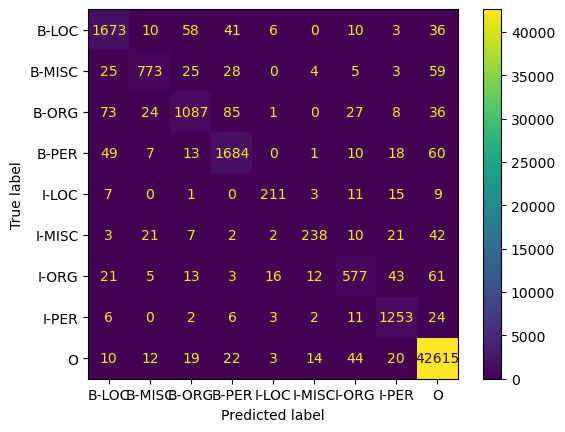

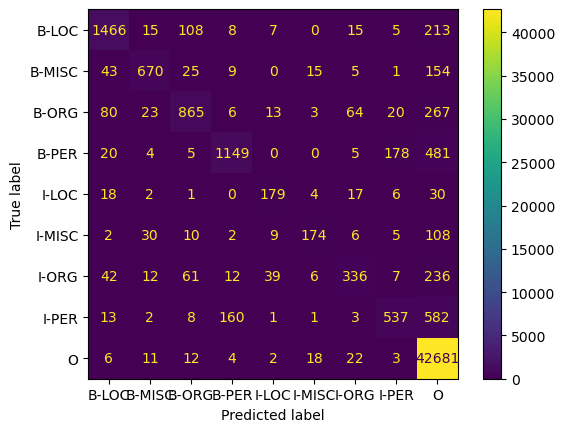

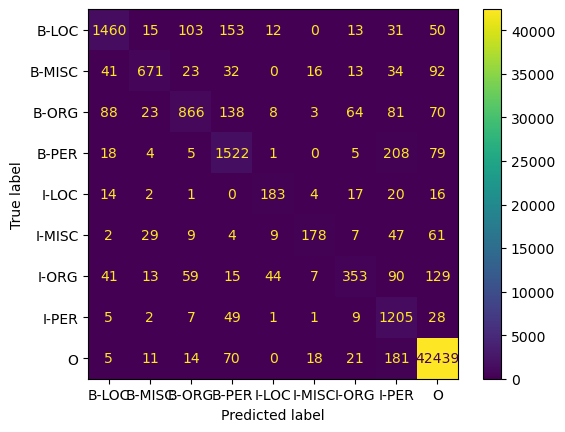

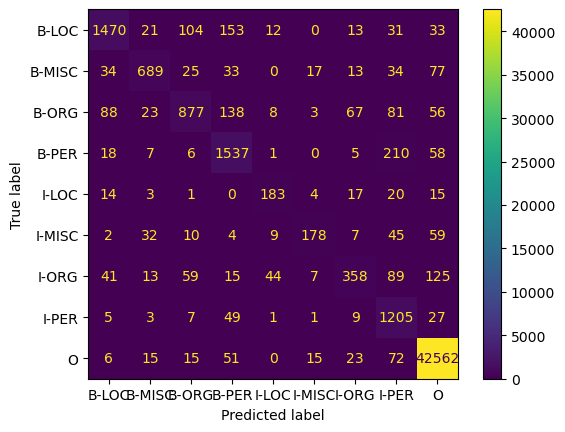

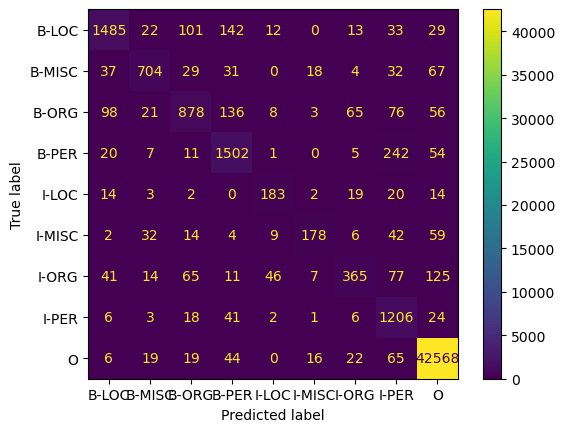

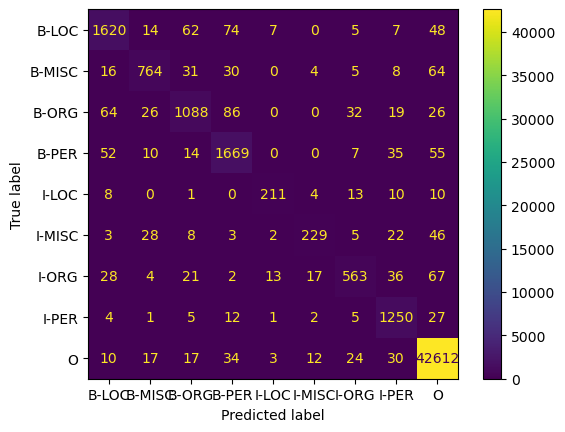

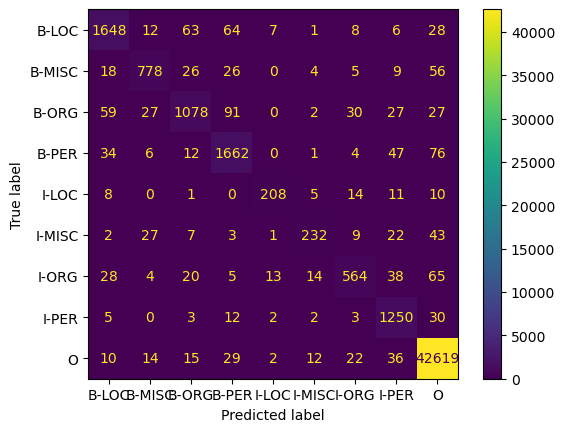

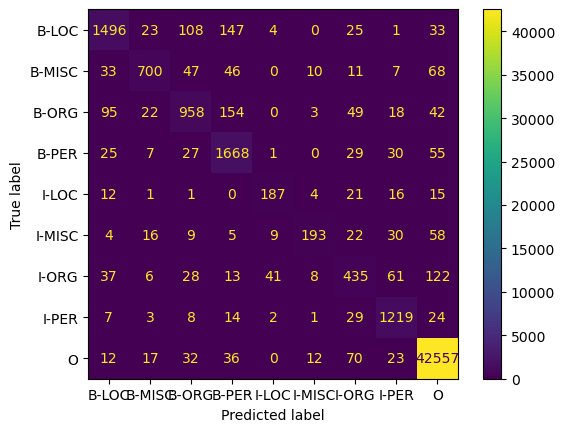

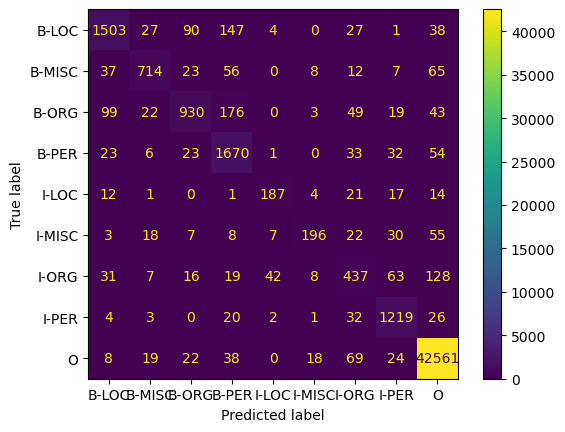

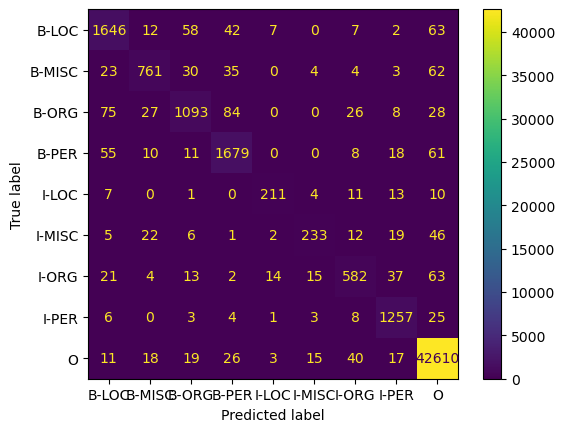

In [40]:
feature_ablation_pipeline(train_file, input_file, './ablations',selected_feature_combinations)

In [12]:
standard_F1 = {'f_0':0.713, 'f_1':0.752, 'f_2': 0.759, 'f_3':0.759,'f_4':0.865, 
           'f_5':0.867, 'f_6':0.796, 'f_7':0.797, 'f_8':0.871, 'f_9':0.873}
weighted_F1 = {'f_0':0.767,'f_1':0.828,'f_2':0.836,'f_3':0.837,'f_4':0.91,
            'f_5':0.912,'f_6':0.861,'f_7':0.861,'f_8':0.913,'f_9':0.915}
span_F1 = {'f_0':0.758,'f_1':0.86,'f_2':0.869,'f_3':0.868,'f_4':0.932,
        'f_5':0.931,'f_6':0.904,'f_7':0.904,'f_8':0.938,'f_9':0.939}

In [14]:
def plot_f1_trends(standard_F1, weighted_F1, span_F1, output_file='f1_trends.png'):
    """
    Plotting standard tag-wise F1 and span F1 in a linear fashion
    :param standard_F1: dictionary storing standard tag-wise F1 scores of every feature combinations
    :param span_F1: dictionary storing span-based F1 scores of every feature combinations
    :param output_file: the output path of the plot
    """
    # Extracting data
    x_labels = list(standard_F1.keys())  # extracting feature combination encodings
    standard_values = list(standard_F1.values())
    weighted_values = list(weighted_F1.values())
    span_values = list(span_F1.values())

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(x_labels, standard_values, marker='o', label='Standard F1')
    #plt.plot(x_labels, weighted_values, marker='s', label='Weighted F1')
    plt.plot(x_labels, span_values, marker='^', label='Span F1')

    # Titles and labels
    plt.title('F1 Score Trends Across Feature Combinations', fontsize=14)
    plt.xlabel('Feature Combinations', fontsize=12)
    plt.ylabel('F1 Score', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)

    # Saving to local and show
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()

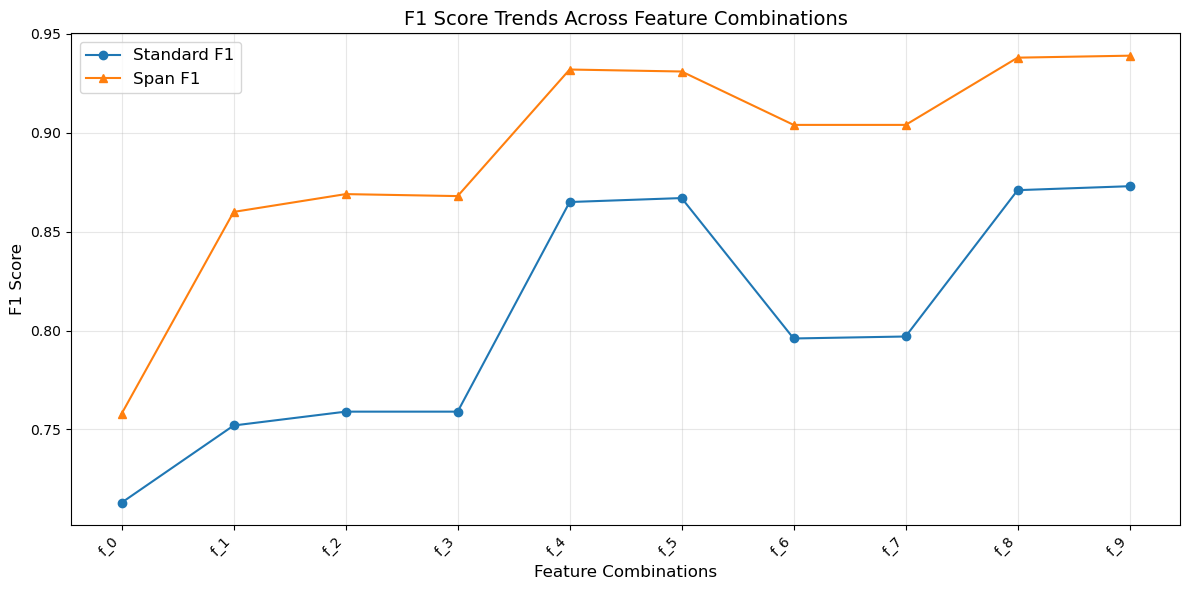

In [16]:
plot_f1_trends(standard_F1, weighted_F1, span_F1, output_file='f1_trends.png')

In [18]:
def plot_f1_scatter(standard_F1, weighted_F1, span_F1, output_file='f1_scatter.png'):
    """
    Plotting standard tag-wise F1 and span F1 in a scatter fashion
    :param standard_F1: dictionary storing standard tag-wise F1 scores of every feature combinations
    :param span_F1: dictionary storing span-based F1 scores of every feature combinations
    :param output_file: the output path of the plot
    """
    # Extracting data
    x_labels = list(standard_F1.keys())  # 特征组合
    x_indices = range(len(x_labels))  # 数值索引作为 x 轴坐标
    standard_values = list(standard_F1.values())
    weighted_values = list(weighted_F1.values())
    span_values = list(span_F1.values())

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.scatter(x_indices, standard_values, marker='o', label='Standard F1', s=100)
    #plt.scatter(x_indices, weighted_values, marker='s', label='Weighted F1', s=100)
    plt.scatter(x_indices, span_values, marker='^', label='Span F1', s=100)

    # Titles and labels
    plt.title('F1 Score Scatter Plot Across Feature Combinations', fontsize=14)
    plt.xlabel('Feature Combinations', fontsize=12)
    plt.ylabel('F1 Score', fontsize=12)
    plt.xticks(x_indices, x_labels, rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)

    # Saving to local and show
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()

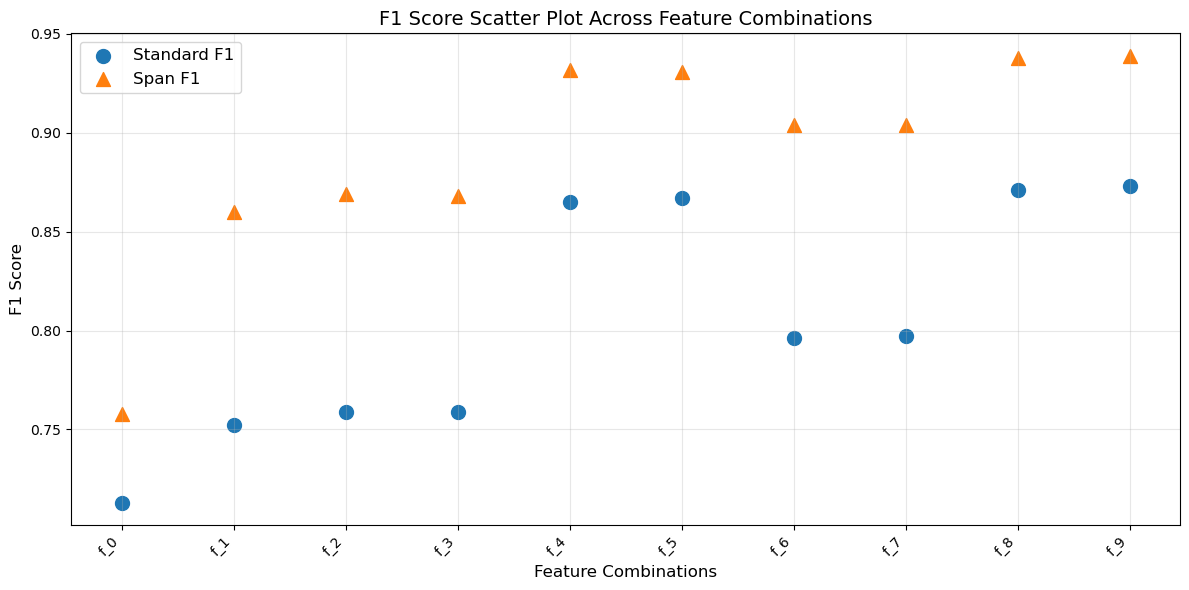

In [20]:
plot_f1_scatter(standard_F1, weighted_F1, span_F1, output_file='f1_scatter.png')

In [76]:
ORG_error_counter = 0
ORG_O_confusion = 0
ORG_PER_confusion = 0
ORG_LOC_confusion = 0
ORG_MISC_confusion = 0

with open('pred_test.w2v_svm.conll', 'r') as infile, open('./loc-errors.conll', 'w') as outfile:
    for n, line in enumerate(infile):
        components = line.rstrip('\n').split()
        if len(components) > 0:
            gold_tag = components[3]
            pred_tag = components[-1]
            if gold_tag.endswith('ORG'):
                if not pred_tag.endswith('ORG'):
                    ORG_error_counter += 1
                    if pred_tag.endswith('O'):
                        ORG_O_confusion += 1
                    if pred_tag.endswith('PER'):
                        ORG_PER_confusion += 1
                    if pred_tag.endswith('LOC'):
                        ORG_LOC_confusion += 1
                    if pred_tag.endswith('MISC'):
                        ORG_MISC_confusion += 1
                    outfile.write(line)

In [78]:
print(f'{round((ORG_O_confusion / ORG_error_counter) * 100, 2)}%')
print(f'{round((ORG_PER_confusion / ORG_error_counter) * 100, 2)}%')
print(f'{round((ORG_LOC_confusion / ORG_error_counter) * 100, 2)}%')
print(f'{round((ORG_MISC_confusion / ORG_error_counter) * 100, 2)}%')
print(ORG_error_counter)

36.34%
21.62%
29.13%
12.91%
333


In [134]:
def extract_errors_typewise(pred_file, error_file, entity_type):
    """
    A function for entity type error analysis.

    :param pred_file: the .conll file containing predictions from a classifier output from ner_machine_learning.py
    :param error_file: the .conll file to store all the error instances
    :param entity_type: the entity type regarded as the starting point of the error analysis

    :print: a string report of the number of errors by types of confusion and their percentage of the total number of errors.
    """
    full_type_list = ['O', 'ORG', 'LOC', 'PER', 'MISC']
    total_error_counter = 0
    if entity_type in full_type_list:
        # Remove the type at question from the list
        types_of_errors = [type for type in full_type_list if type != entity_type]
        # Initialize a error dictionary
        error_dict = {}
        with open(pred_file, 'r') as infile, open(error_file, 'w') as outfile:
            for line in infile:
                components = line.rstrip('\n').split()
                if len(components) > 0:
                    gold_tag = components[3]
                    pred_tag = components[-1]
                    if gold_tag.endswith(entity_type):
                        if not pred_tag.endswith(entity_type):
                            total_error_counter += 1
                            for type in types_of_errors:
                                if pred_tag.endswith(type):
                                    if f'{entity_type}-{type}' not in error_dict:
                                        error_dict[f'{entity_type}-{type}'] = 1
                                    else:
                                        error_dict[f'{entity_type}-{type}'] += 1
                                
                            outfile.write(line)
                            
        for error_type in error_dict:
            print(f'The number of {error_type} errors is {error_dict[error_type]}, taking up {round((error_dict[error_type]/total_error_counter)*100, 2)}% of the total number of errors.')

        print(f'The total number of misclassification of {entity_type} is {total_error_counter}.')

    else:
        print('Input Error: Invalid entity type. Please check your entity_type argument.')

In [160]:
extract_errors_typewise('pred_test.w2v_svm.conll', 'loc-errors-LOC.conll', 'LOC')

The number of LOC-PER errors is 50, taking up 21.74% of the total number of errors.
The number of LOC-ORG errors is 121, taking up 52.61% of the total number of errors.
The number of LOC-MISC errors is 37, taking up 16.09% of the total number of errors.
The number of LOC-O errors is 22, taking up 9.57% of the total number of errors.
The total number of misclassification of LOC is 230.


In [164]:
def extract_errors_dict(pred_file, error_file, entity_type):
    """
    A function for entity type error analysis.

    :param pred_file: the .conll file containing predictions from a classifier output from ner_machine_learning.py
    :param error_file: the .conll file to store all the error instances
    :param entity_type: the entity type regarded as the starting point of the error analysis

    :print: a string report of the number of errors by types of confusion and their percentage of the total number of errors.
    """
    full_type_list = ['O', 'ORG', 'LOC', 'PER', 'MISC']
    total_error_counter = 0
    if entity_type in full_type_list:
        # Remove the type at question from the list
        types_of_errors = [type for type in full_type_list if type != entity_type]
        # Initialize a error dictionary
        error_dict = {}
        with open(pred_file, 'r') as infile:
            for line in infile:
                components = line.rstrip('\n').split()
                if len(components) > 0:
                    gold_tag = components[3]
                    pred_tag = components[-1]
                    if gold_tag.endswith(entity_type):
                        if not pred_tag.endswith(entity_type):
                            total_error_counter += 1
                            for type in types_of_errors:
                                if pred_tag.endswith(type):
                                    if f'{entity_type}-{type}' not in error_dict:
                                        error_dict[f'{entity_type}-{type}'] = 1
                                    else:
                                        error_dict[f'{entity_type}-{type}'] += 1

        return error_dict

    else:
        print('Input Error: Invalid entity type. Please check your entity_type argument.')

In [166]:
extract_errors_dict('pred_test.w2v_svm.conll', 'loc-errors-LOC.conll', 'LOC')

{'LOC-PER': 50, 'LOC-ORG': 121, 'LOC-MISC': 37, 'LOC-O': 22}

In [201]:
def error_instance_sampling(error_file, target_type, num_sample = 5):
    filtered_list = []
    with open(error_file, 'r') as infile:
        for line in infile:
            components = line.rstrip('\n').split()
            if len(components) > 0:
                word_token = components[0]
                pred_tag = components[-1]
                gold_tag = components[3]
                prev_token = components[7]
                next_token = components[8]
                if pred_tag.endswith(target_type):
                    filtered_list.append([word_token, gold_tag, prev_token, next_token, pred_tag])

    return random.sample(filtered_list, num_sample)

In [227]:
error_instance_sampling('loc-errors-LOC.conll', 'ORG')

[['DENPASAR', 'I-LOC', 'TEMBAU', ',', 'I-ORG'],
 ['Blanca', 'I-LOC', 'Bahia', 'Oats', 'I-ORG'],
 ['DHABI', 'I-LOC', 'ABU', '1996-12-07', 'I-ORG'],
 ['PORT', 'B-LOC', '.', 'LOUIS', 'B-ORG'],
 ['CITY', 'I-LOC', 'DODGE', '1996-12-06', 'I-ORG']]

In [7]:
def capitalization_analysis(pred_file):
    """
    A function to retrieve entity detection rate of all data, 
    data with tokens containing capitalization,
    and data without tokens containing capitalization.

    """
    name_counter = 0
    name_noncap_counter = 0
    name_noncap_detect = 0
    name_cap_counter = 0
    name_cap_detect = 0
    total_detect = 0
    
    with open(pred_file, 'r') as infile:
        for line in infile:
            components = line.rstrip('\n').split()
            if len(components) > 0:
                word_token = components[0]
                gold_tag = components[3]
                pred_tag = components[-1]
                non_capitalized = not any(char.isupper() for char in word_token)
                
                if not gold_tag.endswith('O'):
                    name_counter += 1
                    if not pred_tag.endswith('O'):
                        total_detect += 1
                    if non_capitalized:
                        name_noncap_counter += 1
                        if not pred_tag.endswith('O'):
                            name_noncap_detect += 1
                    if not non_capitalized:
                        name_cap_counter += 1
                        if not pred_tag.endswith('O'):
                            name_cap_detect += 1

    print(f'#Named entities = {name_counter}, #Detected named entities = {total_detect}, total detection rate: {round((total_detect/name_counter)*100, 2)}%')
    print(f'#Non-capitalized named entities = {name_noncap_counter}, #Detected non-capitalized named entities = {name_noncap_detect}, non-capitalized detection rate: {round((name_noncap_detect/name_noncap_counter)*100, 2)}%')
    print(f'#Capitalized named entities = {name_cap_counter}, #Detected capitalized named entities = {name_cap_detect}, capitalized detection rate: {round((name_cap_detect/name_cap_counter)*100, 2)}%')

In [9]:
capitalization_analysis('pred_test.w2v_svm.conll')

#Named entities = 8112, #Detected named entities = 7828, total detection rate: 96.5%
#Non-capitalized named entities = 107, #Detected non-capitalized named entities = 55, non-capitalized detection rate: 51.4%
#Capitalized named entities = 8005, #Detected capitalized named entities = 7773, capitalized detection rate: 97.1%
